# Формулирование и проверка гипотез на датасете Climate Change от The World Bank

[Сслыка на датасет](https://data.worldbank.org/topic/19])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
sns.set()

# Подготовка

## Импорт данных

In [2]:
df_main = pd.read_csv('climate_change_data/API_19_DS2_en_csv_v2_5361599.csv', sep=',', skiprows=4)
df_main = df_main.iloc[:, :-1]

id_columns = ['Country Name',
              'Country Code',
              'Indicator Name',
              'Indicator Code']
df_main = pd.melt(df_main, id_vars=id_columns,
                  var_name='Year',
                  value_name='Value')
df_main['Year'] = pd.to_numeric(df_main['Year'])
df_main

Country Name Country Code  \
0              Aruba          ABW   
1              Aruba          ABW   
2              Aruba          ABW   
3              Aruba          ABW   
4              Aruba          ABW   
...              ...          ...   
1253387     Zimbabwe          ZWE   
1253388     Zimbabwe          ZWE   
1253389     Zimbabwe          ZWE   
1253390     Zimbabwe          ZWE   
1253391     Zimbabwe          ZWE   

                                            Indicator Name     Indicator Code  \
0                 Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
1                                         Urban population        SP.URB.TOTL   
2                       Urban population growth (annual %)        SP.URB.GROW   
3                                        Population, total        SP.POP.TOTL   
4                             Population growth (annual %)        SP.POP.GROW   
...                                                    ...                ...   
1253387  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.ZS   
1253388  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1253389                       Arable land (% of land area)     AG.LND.ARBL.ZS   
1253390                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
1253391                         Agricultural land (sq. km)     AG.LND.AGRI.K2   

         Year      Value  
0        1960     50.776  
1        1960  27728.000  
2        1960        NaN  
3        1960  54608.000  
4        1960        NaN  
...       ...        ...  
1253387  2021        NaN  
1253388  2021        NaN  
1253389  2021        NaN  
1253390  2021        NaN  
1253391  2021        NaN  

[1253392 rows x 6 columns]

In [3]:
meta_country_df = pd.read_csv('climate_change_data/Metadata_Country_API_19_DS2_en_csv_v2_5361599.csv')
meta_country_df = meta_country_df.iloc[:, :-1]

In [4]:
meta_indicators_df = pd.read_csv('climate_change_data/Metadata_Indicator_API_19_DS2_en_csv_v2_5361599.csv')
meta_indicators_df.columns = meta_indicators_df.columns.str.lower()
meta_indicators_df.sort_values(['indicator_code'], inplace=True)
meta_indicators_df = meta_indicators_df.reset_index(drop=True)
meta_indicators_df = meta_indicators_df.iloc[:, :-1]

## Что за данные? Анализ метаданных

### country

In [5]:
meta_country_df

Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa           Low income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stretching from the Red Sea in t...   
2    The reporting period for national accounts dat...   
3    22 countries, stretching from the westernmost ...   
4    The World Bank systematically assesses the app...   
..                                                 ...   
260                                                NaN   
261  The World Bank systematically assesses the app...   
262  Fiscal year end: March 31; reporting period fo...   
263  National accounts data were rebased to reflect...   
264  National Accounts data are reported in Zimbabw...   

                       TableName  
0                          Aruba  
1    Africa Eastern and Southern  
2                    Afghanistan  
3     Africa Western and Central  
4                         Angola  
..                           ...  
260                       Kosovo  
261                  Yemen, Rep.  
262                 South Africa  
263                       Zambia  
264                     Zimbabwe  

[265 rows x 5 columns]

Заметим, что здесь имеются не только страны, но и агрегации стран
По территориальному признаку:
* Africa Eastern and Southern
* Africa Western and Central
* World


У таких показателей стоят Nan в IncomeGroup

In [6]:
income_nan_mask = meta_country_df['IncomeGroup'].isna()
meta_country_df[income_nan_mask]

Country Code                     Region IncomeGroup  \
1            AFE                        NaN         NaN   
3            AFW                        NaN         NaN   
7            ARB                        NaN         NaN   
36           CEB                        NaN         NaN   
49           CSS                        NaN         NaN   
61           EAP                        NaN         NaN   
62           EAR                        NaN         NaN   
63           EAS                        NaN         NaN   
64           ECA                        NaN         NaN   
65           ECS                        NaN         NaN   
68           EMU                        NaN         NaN   
73           EUU                        NaN         NaN   
74           FCS                        NaN         NaN   
95           HIC                        NaN         NaN   
98           HPC                        NaN         NaN   
102          IBD                        NaN         NaN   
103          IBT                        NaN         NaN   
104          IDA                        NaN         NaN   
105          IDB                        NaN         NaN   
107          IDX                        NaN         NaN   
127          LAC                        NaN         NaN   
133          LCN                        NaN         NaN   
134          LDC                        NaN         NaN   
135          LIC                        NaN         NaN   
138          LMC                        NaN         NaN   
139          LMY                        NaN         NaN   
141          LTE                        NaN         NaN   
152          MEA                        NaN         NaN   
155          MIC                        NaN         NaN   
160          MNA                        NaN         NaN   
169          NAC                        NaN         NaN   
180          OED                        NaN         NaN   
182          OSS                        NaN         NaN   
190          PRE                        NaN         NaN   
196          PSS                        NaN         NaN   
197          PST                        NaN         NaN   
203          SAS                        NaN         NaN   
214          SSA                        NaN         NaN   
216          SSF                        NaN         NaN   
217          SST                        NaN         NaN   
229          TEA                        NaN         NaN   
230          TEC                        NaN         NaN   
235          TLA                        NaN         NaN   
237          TMN                        NaN         NaN   
239          TSA                        NaN         NaN   
240          TSS                        NaN         NaN   
248          UMC                        NaN         NaN   
253          VEN  Latin America & Caribbean         NaN   
258          WLD                        NaN         NaN   

                                          SpecialNotes  \
1    26 countries, stretching from the Red Sea in t...   
3    22 countries, stretching from the westernmost ...   
7    Arab World aggregate. Arab World is composed o...   
36           Central Europe and the Baltics aggregate.   
49                                                 NaN   
61                                                 NaN   
62   Early-dividend countries are mostly lower-midd...   
63   East Asia and Pacific regional aggregate (incl...   
64                                                 NaN   
65   Europe and Central Asia regional aggregate (in...   
68                                Euro area aggregate.   
73                           European Union aggregate.   
74   Fragile and conflict-affected situations aggre...   
95   High income group aggregate. High-income econo...   
98   The Heavily Indebted Poor Countries (HIPC) ref...   
102                         IBRD only group aggregate.   
103  IDA and IBRD total group aggregate (includes I...   
104  IDA 

In [7]:
region_nan_mask = meta_country_df['Region'].isna()
meta_country_df[region_nan_mask]

Country Code Region IncomeGroup  \
1            AFE    NaN         NaN   
3            AFW    NaN         NaN   
7            ARB    NaN         NaN   
36           CEB    NaN         NaN   
49           CSS    NaN         NaN   
61           EAP    NaN         NaN   
62           EAR    NaN         NaN   
63           EAS    NaN         NaN   
64           ECA    NaN         NaN   
65           ECS    NaN         NaN   
68           EMU    NaN         NaN   
73           EUU    NaN         NaN   
74           FCS    NaN         NaN   
95           HIC    NaN         NaN   
98           HPC    NaN         NaN   
102          IBD    NaN         NaN   
103          IBT    NaN         NaN   
104          IDA    NaN         NaN   
105          IDB    NaN         NaN   
107          IDX    NaN         NaN   
127          LAC    NaN         NaN   
133          LCN    NaN         NaN   
134          LDC    NaN         NaN   
135          LIC    NaN         NaN   
138          LMC    NaN         NaN   
139          LMY    NaN         NaN   
141          LTE    NaN         NaN   
152          MEA    NaN         NaN   
155          MIC    NaN         NaN   
160          MNA    NaN         NaN   
169          NAC    NaN         NaN   
180          OED    NaN         NaN   
182          OSS    NaN         NaN   
190          PRE    NaN         NaN   
196          PSS    NaN         NaN   
197          PST    NaN         NaN   
203          SAS    NaN         NaN   
214          SSA    NaN         NaN   
216          SSF    NaN         NaN   
217          SST    NaN         NaN   
229          TEA    NaN         NaN   
230          TEC    NaN         NaN   
235          TLA    NaN         NaN   
237          TMN    NaN         NaN   
239          TSA    NaN         NaN   
240          TSS    NaN         NaN   
248          UMC    NaN         NaN   
258          WLD    NaN         NaN   

                                          SpecialNotes  \
1    26 countries, stretching from the Red Sea in t...   
3    22 countries, stretching from the westernmost ...   
7    Arab World aggregate. Arab World is composed o...   
36           Central Europe and the Baltics aggregate.   
49                                                 NaN   
61                                                 NaN   
62   Early-dividend countries are mostly lower-midd...   
63   East Asia and Pacific regional aggregate (incl...   
64                                                 NaN   
65   Europe and Central Asia regional aggregate (in...   
68                                Euro area aggregate.   
73                           European Union aggregate.   
74   Fragile and conflict-affected situations aggre...   
95   High income group aggregate. High-income econo...   
98   The Heavily Indebted Poor Countries (HIPC) ref...   
102                         IBRD only group aggregate.   
103  IDA and IBRD total group aggregate (includes I...   
104  IDA total group aggregate (includes IDA only a...   
105                         IDA blend group aggregate.   
107                          IDA only group aggregate.   
127                                                NaN   
133                                                NaN   
134                                                NaN   
135  Low income group aggregate. Low-income economi...   
138  Lower middle income group aggregate. Lower-mid...   
139  Low and middle-income group aggregate. Low and...   
141  Late-dividend countries are mostly upper middl...   
152  Middle East and North Africa regional aggregat...   
155  Middle income group aggregate. Middle-income e...   
160                                                NaN   
169  North America regional aggregate. There are no...   
180                                                NaN   
182                                                NaN   
190  Pre-dividend countries are mostly low-income c...   
196             Pacific island small states aggregate.   
197 

In [8]:
a = region_nan_mask
b = income_nan_mask
both_nan = (a | b) & ~(a & b)
meta_country_df[both_nan]

Country Code                     Region IncomeGroup SpecialNotes  \
253          VEN  Latin America & Caribbean         NaN          NaN   

         TableName  
253  Venezuela, RB

Единственная "страна", у которой толькок один Nan - это Venezuela. У нее нет IncomeGroup, но есть регион.

Вывод: если region - nan, то это не страна, агрегация

In [9]:
# Запишем Названия в таблице для стран, которые на самом деле не являются агрегациями
aggregate_cols = meta_country_df.loc[region_nan_mask, 'TableName']
aggregate_cols

1                            Africa Eastern and Southern
3                             Africa Western and Central
7                                             Arab World
36                        Central Europe and the Baltics
49                                Caribbean small states
61           East Asia & Pacific (excluding high income)
62                            Early-demographic dividend
63                                   East Asia & Pacific
64         Europe & Central Asia (excluding high income)
65                                 Europe & Central Asia
68                                             Euro area
73                                        European Union
74              Fragile and conflict affected situations
95                                           High income
98                Heavily indebted poor countries (HIPC)
102                                            IBRD only
103                                     IDA & IBRD total
104                            

In [10]:
union_aggregate = {'Arab World',
               'European Union'
               'IBRD only',
               'IDA & IBRD total',
                'IBRD only',
               'IDA total',
               'IDA blend',
               'IDA only',
               'OECD members'}


poor_aggregate = {
            'Fragile and conflict affected situations',
            'Heavily indebted poor countries (HIPC)',
            'Least developed countries: UN classification'}

income_aggregate = {'Low income',
                    'Lower middle income',
                    'Low & middle income',
                    'Upper middle income',
                    'Middle income',
                    'High income'}

dividend_aggregate = {'Early-demographic dividend',
                      'Late-demographic dividend',
                      'Pre-demographic dividend',
                      'Post-demographic dividend'}

all_without_region = union_aggregate.union(poor_aggregate).union(income_aggregate).union(dividend_aggregate)


region_aggregate = set(aggregate_cols.to_list()).difference(all_without_region)
region_aggregate

{'Africa Eastern and Southern',
 'Africa Western and Central',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Latin America & Caribbean',
 'Latin America & Caribbean (IDA & IBRD)',
 'Latin America & Caribbean (excluding high income)',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD)',
 'Middle East & North Africa (excluding high income)',
 'North America',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD)',
 'Sub-Saharan Africa (excluding high income)',
 'World'}

### indicators

In [11]:
meta_indicators_df

indicator_code                                     indicator_name  \
0      AG.LND.AGRI.K2                         Agricultural land (sq. km)   
1      AG.LND.AGRI.ZS                 Agricultural land (% of land area)   
2      AG.LND.ARBL.ZS                       Arable land (% of land area)   
3   AG.LND.EL5M.RU.K2  Rural land area where elevation is below 5 met...   
4   AG.LND.EL5M.RU.ZS  Rural land area where elevation is below 5 met...   
..                ...                                                ...   
71        SP.POP.GROW                       Population growth (annual %)   
72        SP.POP.TOTL                                  Population, total   
73        SP.URB.GROW                 Urban population growth (annual %)   
74        SP.URB.TOTL                                   Urban population   
75  SP.URB.TOTL.IN.ZS           Urban population (% of total population)   

                                          source_note  \
0   Agricultural land refers to the share of land ...   
1   Agricultural land refers to the share of land ...   
2   Arable land includes land defined by the FAO a...   
3   Rural land area below 5m is the total rural la...   
4   Rural land area below 5m is the percentage of ...   
..                                                ...   
71  Annual population growth rate for year t is th...   
72  Total population is based on the de facto defi...   
73  Urban population refers to people living in ur...   
74  Urban population refers to people living in ur...   
75  Urban population refers to people living in ur...   

                                  source_organization  
0   Food and Agriculture Organization, electronic ...  
1   Food and Agriculture Organization, electronic ...  
2   Food and Agriculture Organization, electronic ...  
3   Center for International Earth Science Informa...  
4   Center for International Earth Science Informa...  
..                                                ...  
71  Derived from total population. Population sour...  
72  (1) United Nations Population Division. World ...  
73  World Bank staff estimates based on the United...  
74  World Bank staff estimates based on the United...  
75  United Nations Population Division. World Urba...  

[76 rows x 4 columns]

По indcator_code можно Понять к какой категории относится метрика.
* AG - Agticulture
* BX - Инвестиции в страну
* NV - Влад зеленого бизнеса в экономику
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статисткиа популяции
    * POP - популяция в целом
    * URB - урбанизация
* SI - бедность

Кластеризуем



Метрики достатка:

* AG - возможности и использование земледелия
* BX - Инвестиции в страну
* NV - Вклад Agriculture, forestry, and fishing в % от ВВП
* IC - Ease of doing business
* SE - образование
* SH - медицина, смертность
* SP - статистка популяции
    * POP - популяция в целом
    * URB - урбанизация

Метрики потребления:
* EG - Энергия
    * ELC - электричество. Сколько подключено. Производство
    * FEC - Потребления возобновляемой энергии
    * USE - использование

Метрики загрязнения:
* EN - Показатели окружающей среды
    * ATM - загрязнение атмосферы
    * CLS - Катаклизмы
    * POP - Количество людей проживающих в определенных экологических условиях
    * URB - урбанизация

### Вывод по метаданным

-Для каждой категории имеется много метрик. Надо определить наиболее полезные из них по семантике и отсутсвию пустых значений

-Отделить агрегированные данные от данных по конкретным странам

## Выбор данных годов, метрик и стран на основании отсутствующих значений и полезности метрик

In [12]:
def metrics_with_code(codes):
    mask = meta_indicators_df.str.contains(codes[0])
    for code in codes[1:]:
        mask |= meta_indicators_df.str.contains(code)
    return meta_country_df.loc[mask, 'indicator_code']

### Выбор года

Text(0, 0.5, 'Количество nan')

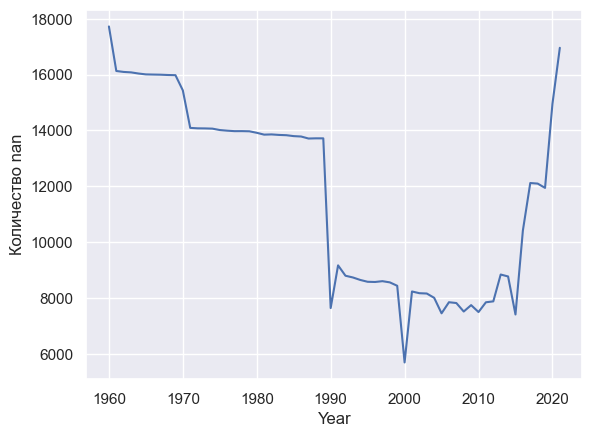

In [13]:
nans_cnt = df_main.groupby('Year').apply(lambda x: x['Value'].isna().sum())
sns.lineplot(nans_cnt)
plt.ylabel('Количество nan')

Так как данных меньше всего с 1990 по 2012, то ограничимся ими

In [14]:
mask = (df_main['Year'] >= 1990) & (df_main['Year'] <= 2012)
df_main = df_main[mask]

### Выбор метрик

In [15]:
df_main

Country Name Country Code  \
606480         Aruba          ABW   
606481         Aruba          ABW   
606482         Aruba          ABW   
606483         Aruba          ABW   
606484         Aruba          ABW   
...              ...          ...   
1071443     Zimbabwe          ZWE   
1071444     Zimbabwe          ZWE   
1071445     Zimbabwe          ZWE   
1071446     Zimbabwe          ZWE   
1071447     Zimbabwe          ZWE   

                                            Indicator Name     Indicator Code  \
606480            Urban population (% of total population)  SP.URB.TOTL.IN.ZS   
606481                                    Urban population        SP.URB.TOTL   
606482                  Urban population growth (annual %)        SP.URB.GROW   
606483                                   Population, total        SP.POP.TOTL   
606484                        Population growth (annual %)        SP.POP.GROW   
...                                                    ...                ...   
1071443  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.ZS   
1071444  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1071445                       Arable land (% of land area)     AG.LND.ARBL.ZS   
1071446                 Agricultural land (% of land area)     AG.LND.AGRI.ZS   
1071447                         Agricultural land (sq. km)     AG.LND.AGRI.K2   

         Year          Value  
606480   1990      50.319000  
606481   1990   33066.000000  
606482   1990       1.683480  
606483   1990   65712.000000  
606484   1990       1.712907  
...       ...            ...  
1071443  2012            NaN  
1071444  2012            NaN  
1071445  2012      10.339925  
1071446  2012      41.876696  
1071447  2012  162000.000000  

[464968 rows x 6 columns]

In [16]:
#nans_cnt = df_main.groupby('Indicator Name').apply(lambda x: x['Value'].isna().sum())
nans_cnt.sort_values(inplace=True)
nans_cnt.reset_index(name='nans cnt')

Year  nans cnt
0   2000      5688
1   2015      7406
2   2005      7448
3   2010      7493
4   2008      7512
..   ...       ...
57  1963     16077
58  1962     16093
59  1961     16127
60  2021     16957
61  1960     17722

[62 rows x 2 columns]

Какие метрики оставим?


**Energy**:

"Renewable electricity output (% of total electricity output)",
"Energy use (kg of oil equivalent per capita)",
"Electric power consumption (kWh per capita)",
"Electricity production from renewable sources, excluding hydroelectric (kWh)",
"Electricity production from coal sources (% of total)",
"Electricity production from hydroelectric sources (% of total)",
"Electricity production from natural gas sources (% of total)",
"Electricity production from nuclear sources (% of total)",
"Electricity production from oil sources (% of total)",
"Electricity production from renewable sources, excluding hydroelectric (% of total)"


**Population**:
"Population, total",
"Population growth (annual %)",
"Urban population (% of total population)",
"Urban population growth (annual %)"

**Economics**:
"Foreign direct investment, net inflows (% of GDP)",
"Mortality rate, under-5 (per 1,000 live births)",

**Agriculture**:
"Agricultural land (% of land area)",
"Forest area (% of land area)",
"Arable land (% of land area)",
"Agriculture, forestry, and fishing, value added (% of GDP)",

**Atmosphere emissions**:
"Methane emissions (kt of CO2 equivalent)",
"Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
"CO2 emissions (metric tons per capita)",
"CO2 emissions from liquid fuel consumption (% of total)",
"CO2 emissions from solid fuel consumption (% of total)",
"CO2 emissions from gaseous fuel consumption (% of total)",

Оставим только выбранные метрики

In [17]:
selected_metrics = ["Renewable electricity output (% of total electricity output)",
                    "Energy use (kg of oil equivalent per capita)",
                    "Electric power consumption (kWh per capita)",
                    "Electricity production from renewable sources, excluding hydroelectric (kWh)",
                    "Electricity production from coal sources (% of total)",
                    "Electricity production from hydroelectric sources (% of total)",
                    "Electricity production from natural gas sources (% of total)",
                    "Electricity production from nuclear sources (% of total)",
                    "Electricity production from oil sources (% of total)",
                    "Electricity production from renewable sources, excluding hydroelectric (% of total)",
                    "Population, total",
                    "Population growth (annual %)",
                    "Urban population (% of total population)",
                    "Urban population growth (annual %)",
                    "Foreign direct investment, net inflows (% of GDP)",
                    "Mortality rate, under-5 (per 1,000 live births)",
                    "Agricultural land (% of land area)",
                    "Forest area (% of land area)",
                    "Arable land (% of land area)",
                    "Agriculture, forestry, and fishing, value added (% of GDP)",
                    "Methane emissions (kt of CO2 equivalent)",
                    "Nitrous oxide emissions (thousand metric tons of CO2 equivalent)",
                    "Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",
                    "CO2 emissions (metric tons per capita)",
                    "CO2 emissions from liquid fuel consumption (% of total)",
                    "CO2 emissions from solid fuel consumption (% of total)",
                    "CO2 emissions from gaseous fuel consumption (% of total)"]

In [18]:
df_main = df_main[df_main['Indicator Name'].isin(selected_metrics)]
meta_indicators_df = meta_indicators_df[meta_indicators_df['indicator_name'].isin(selected_metrics)]

## Вывод по подготовке

**Откуда взяты данные?**
[The World Bank](https://data.worldbank.org/topic/19)

**Какие данные имеем?**
Имеем данные по странам и агрегациям стран за годы с 1990 по 2012. Для каждой пары страна-год имеем набор метрик.
Метрики можно отнести к типам:
* Загрязненность атмосферы
* Экономические метрики
* Развитость сельского хозяйства и "зеленость" страны
* Потребление и способы добычи энергии
* Городское и сельское население страны

Все метрики перечислены в предыдущем пункте. Тип данных - float. В названии описана величина и единицы измерения


**Для чего можно использовать данные?**
* Наблюдение динамики по миру
    * Как изменилась экологическая обстановка за 20 лет?
    * Темпы роста урбанизации за 20 лет
* Наблюдение динамика в рамках одной страны
    * Как менялось экономическое положение страны, а вместе с этим вред окружающей среде?
* Выявление факторов, косвенно влияющих на экологию
    *  Какая взаимосвязь между развитием сельского хозяйства и вреда экологии?
    * Можем ли мы говорить, что более бедные страны более экологичны
    * Является ли высокий уровень урбанизации причиной высокого выброса CO2 в атмосферу?
    * Являются ли страны с традиционными методами земледелия более экологичными?


## Переименовывание столбцов

In [19]:
cols = ['country_name', 'country_code', 'indicator_name', 'indicator_code', 'year', 'value']
df_main.columns = cols
df_main

country_name country_code  \
606480         Aruba          ABW   
606482         Aruba          ABW   
606483         Aruba          ABW   
606484         Aruba          ABW   
606488         Aruba          ABW   
...              ...          ...   
1071432     Zimbabwe          ZWE   
1071434     Zimbabwe          ZWE   
1071438     Zimbabwe          ZWE   
1071445     Zimbabwe          ZWE   
1071446     Zimbabwe          ZWE   

                                            indicator_name  \
606480            Urban population (% of total population)   
606482                  Urban population growth (annual %)   
606483                                   Population, total   
606484                        Population growth (annual %)   
606488     Mortality rate, under-5 (per 1,000 live births)   
...                                                    ...   
1071432  Electricity production from coal sources (% of...   
1071434  Foreign direct investment, net inflows (% of GDP)   
1071438                       Forest area (% of land area)   
1071445                       Arable land (% of land area)   
1071446                 Agricultural land (% of land area)   

               indicator_code  year         value  
606480      SP.URB.TOTL.IN.ZS  1990     50.319000  
606482            SP.URB.GROW  1990      1.683480  
606483            SP.POP.TOTL  1990  65712.000000  
606484            SP.POP.GROW  1990      1.712907  
606488            SH.DYN.MORT  1990           NaN  
...                       ...   ...           ...  
1071432        EG.ELC.COAL.ZS  2012     39.052483  
1071434  BX.KLT.DINV.WD.GD.ZS  2012      2.044131  
1071438        AG.LND.FRST.ZS  2012     46.046633  
1071445        AG.LND.ARBL.ZS  2012     10.339925  
1071446        AG.LND.AGRI.ZS  2012     41.876696  

[165186 rows x 6 columns]

## Создание сводной таблицы

In [20]:
df_pivot = pd.pivot_table(df_main,
                       index=['country_name','country_code', 'year'],
                       columns='indicator_code',
                       values=['value'])
df_pivot = df_pivot.reset_index()
cols = list(df_pivot.columns.get_level_values(1))
cols[:3] = ['country_name', 'country_code', 'year']
df_pivot.columns = cols
df_pivot

country_name country_code  year  AG.LND.AGRI.ZS  AG.LND.ARBL.ZS  \
0     Afghanistan          AFG  1990       58.322984       12.127624   
1     Afghanistan          AFG  1991       58.307652       12.127624   
2     Afghanistan          AFG  1992       58.307652       12.127624   
3     Afghanistan          AFG  1993       58.160465       11.995768   
4     Afghanistan          AFG  1994       57.974947       11.810251   
...           ...          ...   ...             ...             ...   
6090     Zimbabwe          ZWE  2008       42.522942       10.986170   
6091     Zimbabwe          ZWE  2009       42.135195       10.598423   
6092     Zimbabwe          ZWE  2010       41.876696       10.339925   
6093     Zimbabwe          ZWE  2011       42.393693       10.856921   
6094     Zimbabwe          ZWE  2012       41.876696       10.339925   

      AG.LND.FRST.ZS  BX.KLT.DINV.WD.GD.ZS  EG.ELC.COAL.ZS  EG.ELC.HYRO.ZS  \
0           1.852782                   NaN             NaN             NaN   
1           1.852782                   NaN             NaN             NaN   
2           1.852782                   NaN             NaN             NaN   
3           1.852782                   NaN             NaN             NaN   
4           1.852782                   NaN             NaN             NaN   
...              ...                   ...             ...             ...   
6090       46.522993              1.168557       23.711475       74.859016   
6091       46.403903              1.086305       24.070772       74.859416   
6092       46.284813              1.018022       31.713791       66.924409   
6093       46.165723              2.441511       41.655816       56.434462   
6094       46.046633              2.044131       39.052483       58.567858   

      EG.ELC.NGAS.ZS  ...  EN.ATM.CO2E.SF.ZS  EN.ATM.GHGO.KT.CE  \
0                NaN  ...           9.415270         935.064407   
1                NaN  ...           9.100584         765.938263   
2                NaN  ...           1.538601        -263.076820   
3                NaN  ...           1.348162        -325.709000   
4                NaN  ...           1.128308        -650.316902   
...              ...  ...                ...                ...   
6090             0.0  ...          78.454500         -30.492310   
6091             0.0  ...          46.227858        -532.520508   
6092             0.0  ...          57.528165         608.506409   
6093             0.0  ...          50.999704        1469.966370   
6094             0.0  ...          28.403353        1827.732117   

      EN.ATM.METH.KT.CE  EN.ATM.NOXE.KT.CE  NV.AGR.TOTL.ZS  SH.DYN.MORT  \
0           6739.999771             2840.0             NaN        178.5   
1           7019.999981             2930.0             NaN        172.2   
2           7130.000114             2890.0             NaN        166.3   
3           7210.000038             2930.0             NaN        160.8   
4           7469.999790             2760.0             NaN        155.5   
...                 ...                ...             ...          ...   
6090       11369.999886             5360.0       19.021074         94.7   
6091       11829.999924             5770.0       10.742550         91.3   
6092       12270.000458             6120.0        9.609863         86.1   
6093       12640.000343             6260.0        8.665865         80.6   
6094       12460.000038             5800.0        8.044518         72.1   

      SP.POP.GROW  SP.POP.TOTL  SP.URB.GROW  SP.URB.TOTL.IN.ZS  
0        0.202434   10694796.0     0.623574             21.177  
1        0.469880   10745167.0     0.889255             21.266  
2       11.522524   12057433.0    11.940176             21.355  
3       14.964455   14003760.0    15.380336             21.444  
4        9.864262   15455555.0    10.283085             21.534  
...           ...          ...          ...                ...  
6090     0.798207   12550347.0     0.25438

## Добавление столбца income_group

In [21]:
income_data = meta_country_df[['Country Code', 'IncomeGroup']]
df_pivot = df_pivot.merge(income_data,
               how='left',
               left_on='country_code',
               right_on='Country Code')
df_pivot.drop('Country Code', axis=1, inplace=True)

# Проработка гипотез

## В Африке, в отличие от других частей света, стабильно прибавляется городское население.

In [22]:
def get_correlation(df):
    return df[['SP.URB.TOTL.IN.ZS', 'year']].corr().iloc[0, 1]

country_correlation = df_pivot.groupby('country_code').apply(get_correlation)

country_correlation = country_correlation.reset_index(name='correlation')
country_correlation.dropna(inplace=True)
country_correlation.sort_values('correlation', ascending=False, inplace=True)
country_correlation = country_correlation.merge(meta_country_df, left_on='country_code', right_on='Country Code')
country_correlation = country_correlation[['country_code', 'correlation', 'TableName', 'IncomeGroup']]


fig = px.choropleth(country_correlation, locations='country_code', color='correlation',
                    projection='natural earth')
fig.update_layout(title='Correlation between year and % of urban population',
                  geo=dict(
                      showcoastlines=True,
                      showland=True,
                      landcolor='rgb(243, 243, 243)',
                      countrycolor='white'),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

### Вывод

На карте видно, что в среднем корреляция выше в регионах Северной и Южной Америки, чем в Африке. Гипотеза опровергнута

## Выбросы CO2 растут пропорционально % городского населения страны

### Статистика по миру

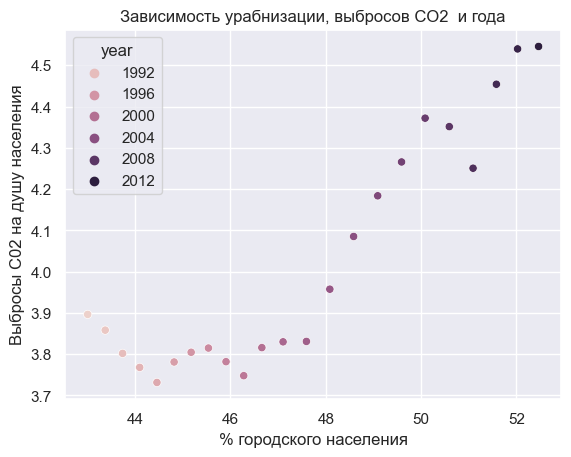

In [23]:
wrld = df_pivot[df_pivot['country_name'] == 'World']
sns.scatterplot(wrld, x='SP.URB.TOTL.IN.ZS', y='EN.ATM.CO2E.PC', hue='year')
plt.xlabel('% городского населения')
plt.ylabel('Выбросы C02 на душу населения')
plt.title('Зависимость урабнизации, выбросов CO2  и года');


Видим, что:
- По миру с каждым годом растет процент городского населения
- Количество выбросов CO2 на душу населения растет

### Визализируем зависимость год ~ выброс CO2 для стран с разной корреляцией прироста городоского населения от

Если мы увидим, что для стран с высокой корреляцией выброс CO2 увеличивается, то гипотезу можно считать верной

Дополнительные условия: разобьем на данные на группы по уровню достатка. Может зависимость "CO2" ~ "% городского населения" проявляет себя по разному в зависимости от уровня достатка страны


In [24]:
def select_correlation(n, desired_correlation, mask):
    df = country_correlation[mask].copy()
    df['distance'] = np.abs(df['correlation'] - desired_correlation)
    df['distance'] *= -1
    largest = df.nlargest(n, 'distance')
    return largest.drop('distance', axis=1)

def get_correlation(df):
    return df[['SP.URB.TOTL.IN.ZS', 'year']].corr().iloc[0, 1]

def is_CO2_col_valid(country_code):
    mask = df_pivot['country_code'] == country_code
    df = df_pivot[mask]
    return df['EN.ATM.CO2E.PC'].notna().mean() > 0.7

country_correlation = df_pivot.groupby('country_code').apply(get_correlation)

country_correlation = country_correlation.reset_index(name='correlation')
country_correlation.dropna(inplace=True)
country_correlation.sort_values('correlation', ascending=False, inplace=True)
country_correlation = country_correlation.merge(meta_country_df, left_on='country_code', right_on='Country Code')
country_correlation = country_correlation[['country_code', 'correlation', 'TableName', 'IncomeGroup']]



valid_mask = country_correlation['country_code'].transform(is_CO2_col_valid)
country_correlation = country_correlation[valid_mask]

In [25]:
def visualize(income_group, desired_correlation):
    fig, axis = plt.subplots(1, 2, figsize=(12, 4))
    mask = country_correlation['IncomeGroup'] == income_group
    df = select_correlation(2, desired_correlation, mask)
    for ind, (_, row) in enumerate(df.iterrows()):
        country_code = row['country_code']
        country_name = row['TableName']
        correlation = row['correlation']
        ax = axis[ind]
        mask = df_pivot['country_code'] == country_code
        sns.regplot(df_pivot[mask], x='year', y='EN.ATM.CO2E.PC', ax=ax)
        ax.set_title(f'year~urban population%={correlation:.2f}; country={country_name}')
    fig.suptitle(f'income group={income_group}')
    axis[0].set_ylabel('CO2 per capita')
    axis[1].set_ylabel('')


incomes = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']

Возьмем 2 страны из каждого финансового сектора и посмотрим на зависимость выброса CO2 от года для различной корреляции year ~ "% городского населения"

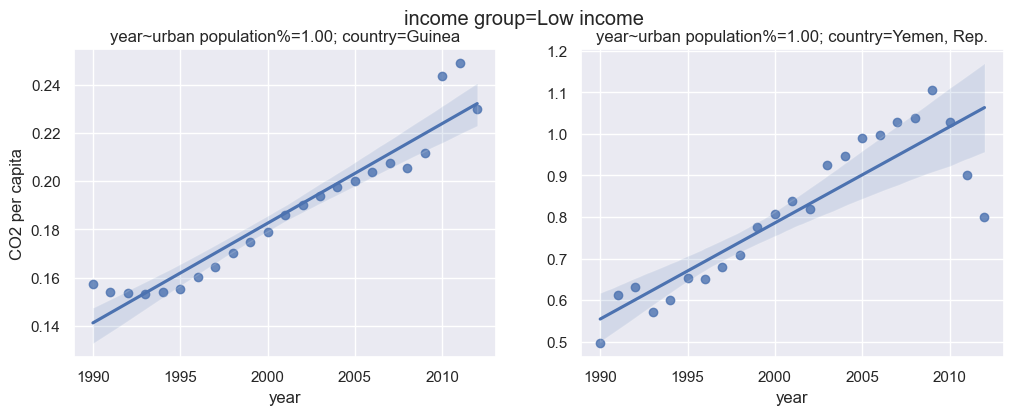

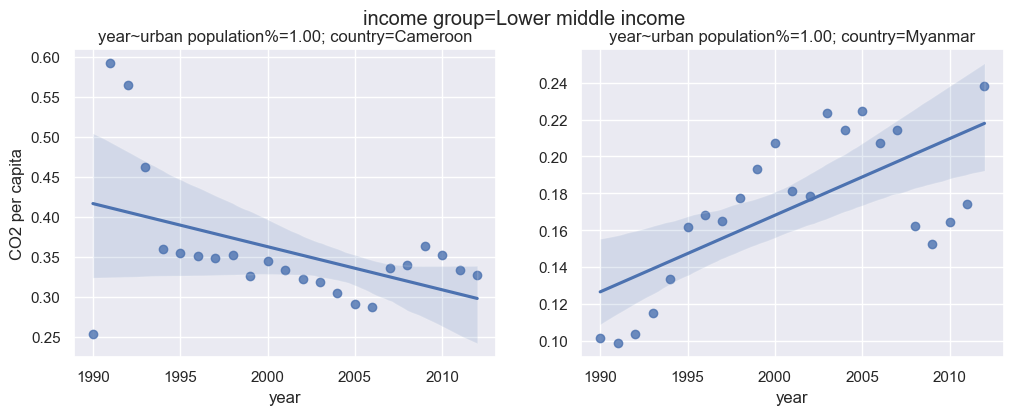

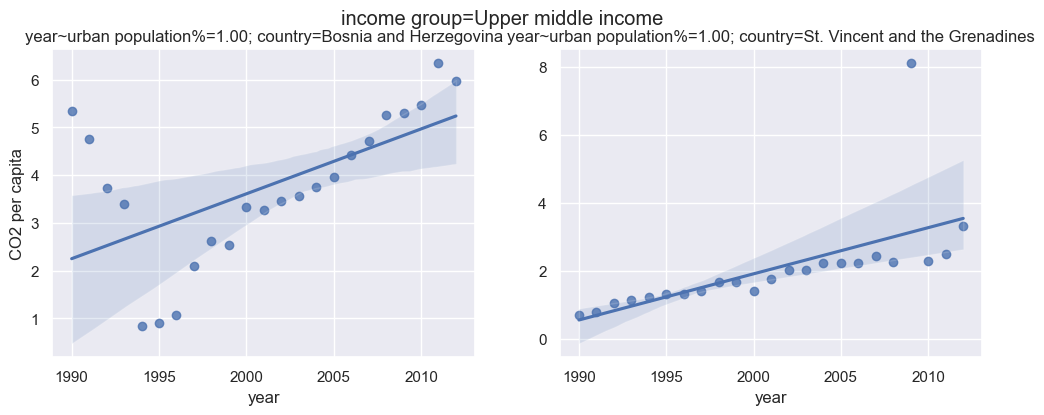

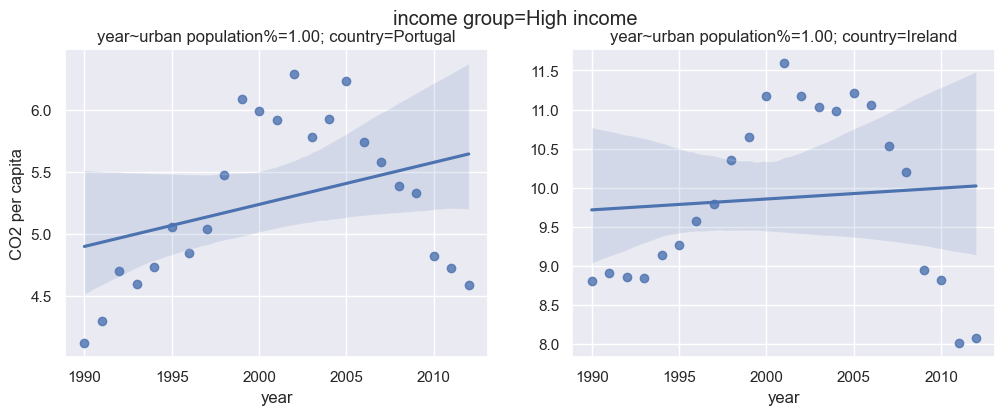

In [26]:
for income in incomes:
    visualize(income, 1)

Анализ:
* В Low сильная корреляция
* В Lower Middle встречаемся противоположными влияниями
* В Upper middle положительная корреляция
* В High видим параболу. То есть прямой зависимости нет.
    Это может быть вызвана тем, что страны с высоким доходом тратят средства на снижение выбросов CO2 в атмосферу


Вывод:
* С большей долей вероятности гипотеза в исходном ее виде непригодна. Возможно она будет более правдоподобна, если мы будем говорить только об одной группе доходов
* После 2007 года в high сегменте наблюдается снижение CO2

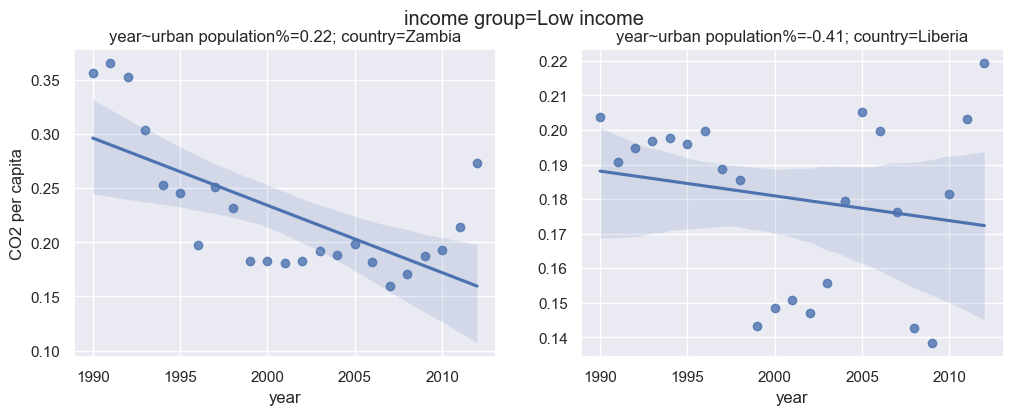

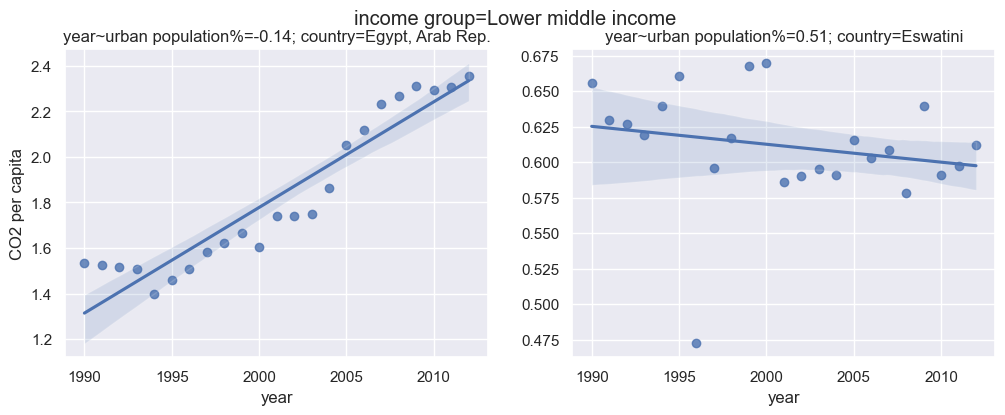

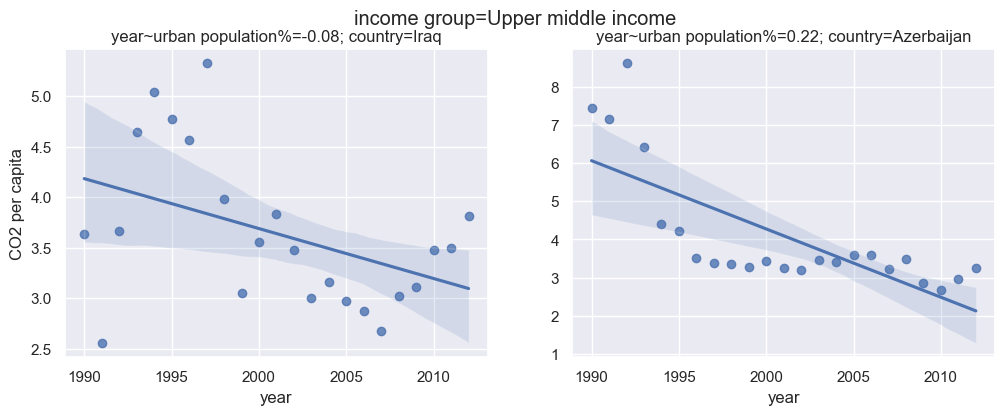

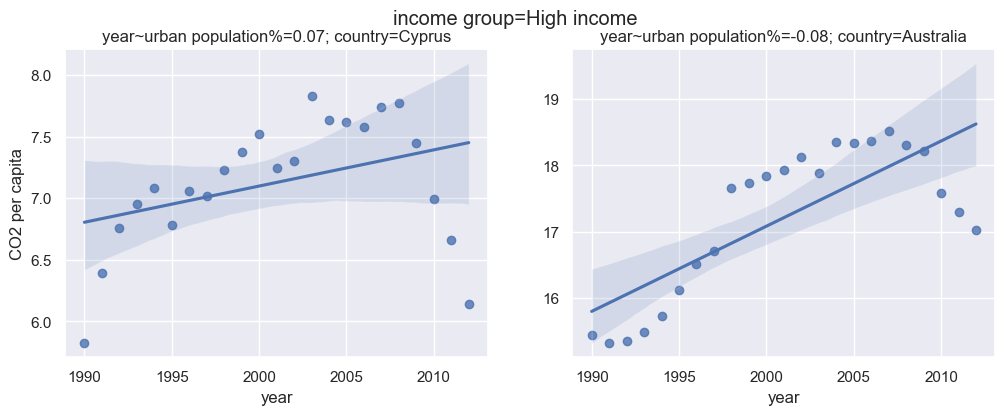

In [27]:
for income in incomes:
    visualize(income, 0)

Анализ:
* Low: несильный отрицательный тренд
* Lower middle: диаметральные ситуации. Один имеет сильную положительную, другой слабую отрицательный
* Upper middle: Слабый отрицательный тренд
* High: Слабый положительный

Вывод:
* Выраженность зависимости стала слабее, что частично подтверждает гипотезу. Однако, в частных случаях наблюдается нарушение прямой зависимости.
* Продолжает наблюдаться тренд с уменьшением выбросов в странах с большим доходом, начиная с ~2008 года

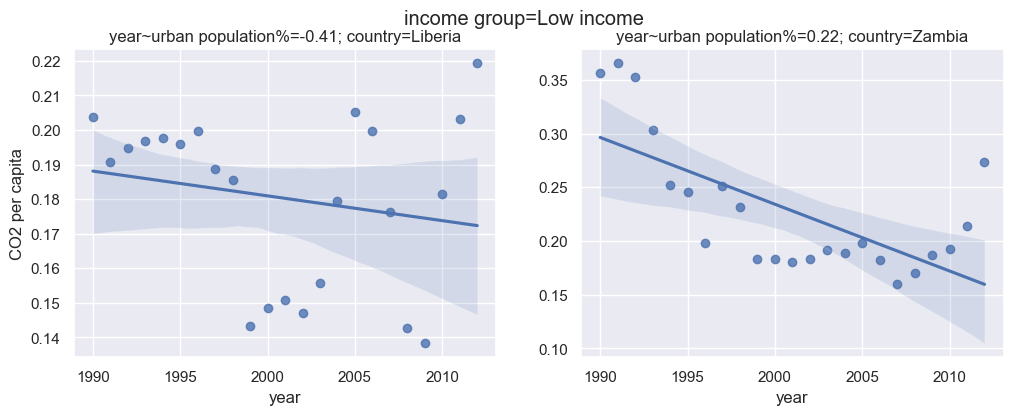

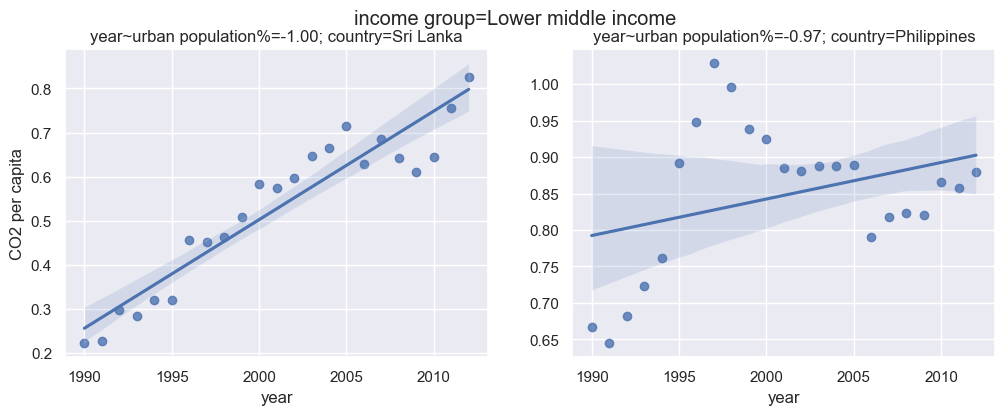

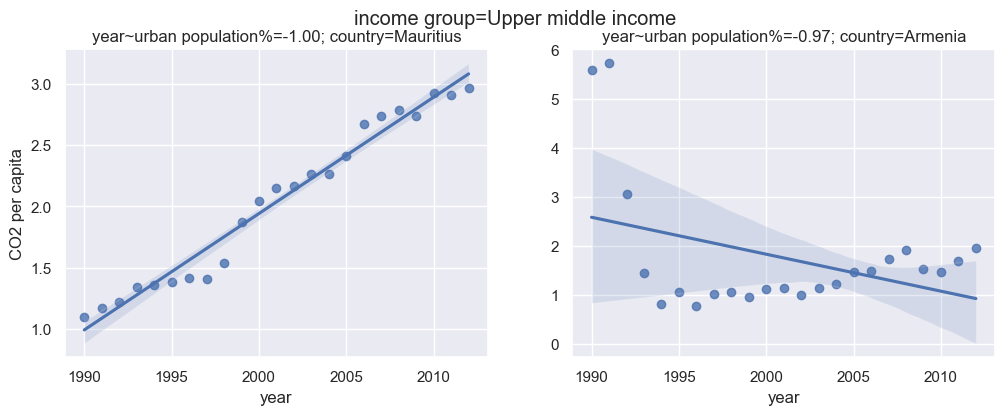

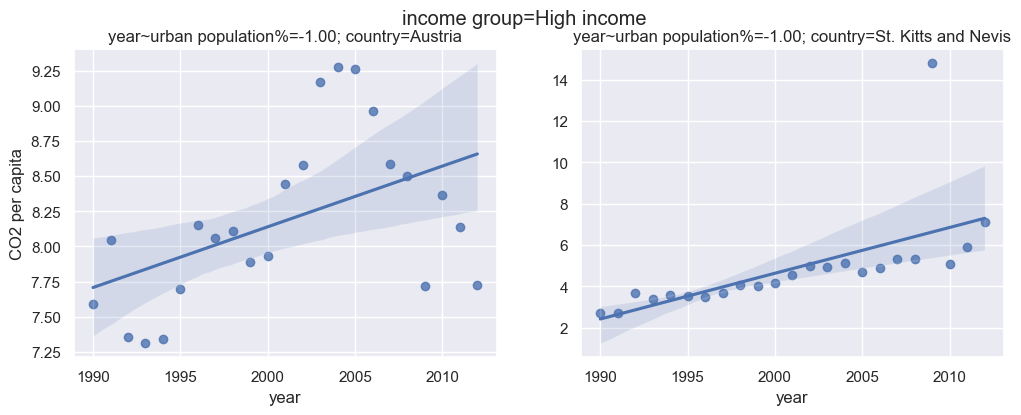

In [28]:
for income in incomes:
    visualize(income, -1)

Анализ:
* Видим, что у Low выбраны страны как и в случае с 0. Это объясняется тем, что в группе с Low Income нет стран с отрицательным процентом сельского населения.
* Lower middle: В Sri Lanka сильный положительный тренд. В Phillipines практически отсутствуют изменения
* Upper middle: Диаметральная ситуация. Mauritius - сильный положительны тренд. Armenis - слабая зависимость
* High: у Australia наблюдается тенденция к снижению выбросов после ~2007 года. St. Kitts and Nevis сильный положительный тренд.


Вывод:
* У бедных стран высокий прирост городского населения
* Наблюдается большое количество сильных положительных трендов вне зависимости от прибыли страны, что разрушает гипотезу.
* Сохраняется тренд на уменьшение выбросов CO2 для стран с высоким достатком

### Вывод

Гипотеза "Чем больше темпы роста урбанизации страны, тем больше выброс CO2 в атмосферу" - неверна

Более конкретные гипотезы взамен текущей:
* Сектор Low Income имеет высокие темпы урбанизации
* Высокие темпы урабнизации критичны только для Low Income сектора, потому что у них не инвестируют средства в защиту окружающей среды
* Страны сегмента High Income имеют тенденцию к снижению выброса CO2 после 2007 года, что связано с более рациональным использованием энергии


## Сектор Low Income имеет высокие темпы урбанизации

### Данные по агрегации

Text(0.5, 1.0, 'Среднее значений % городского населения для сектора Low income')

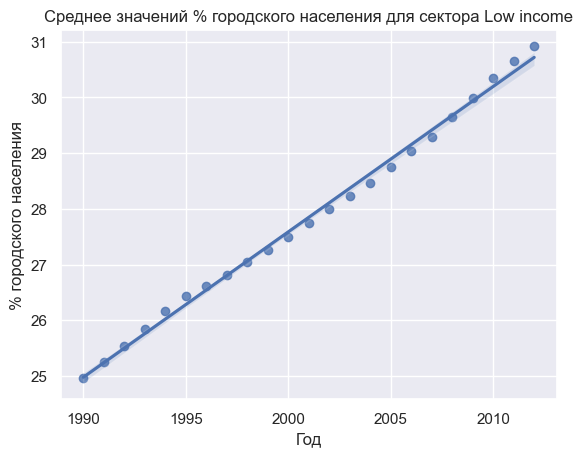

In [29]:
mask = df_pivot['country_name'] == 'Low income'
sns.regplot(data=df_pivot[mask], x='year', y='SP.URB.TOTL.IN.ZS')
plt.xlabel('Год')
plt.ylabel('% городского населения')
plt.title('Среднее значений % городского населения для сектора Low income')

Видим практически идеальную корреляцию

### В сравнении с другими секторами

Из предыдущего пункта мы поняли, что в Low Income практически отсутствуют страны с низким или отрицательным темпом урбанизации.

Проверим нашу гипотезу, сравнив со странами из других сегментов.

In [30]:

fig = go.Figure()

for income in incomes:
    data = country_correlation[country_correlation['IncomeGroup'] == income]
    fig.add_trace(go.Histogram(x=data['correlation'],
                               nbinsx=15,
                               name=income,
                               histnorm='probability'))

fig.update_layout(margin=dict(l=0, r=0, t=30, b=0),
                  title='distribution of year~urban_population_% correlation')

Вывод: тренд роста урбанизации выражен во всех категориях, но наиболее ярко он проявляется в Low income

### Вывод

Гипотеза верна

## Сектор LowIncome. Страны с низкой урбанизацией в 1990 имеют больший темп урбанизации по сравнению со странами, которые имели в 1990 высокую урбанизацию для этого сектора

In [31]:
low_income = df_pivot[df_pivot['IncomeGroup']=='Low income']

### Распределение % городского населения по годам для различных квартилей урбанизации в 1990 году

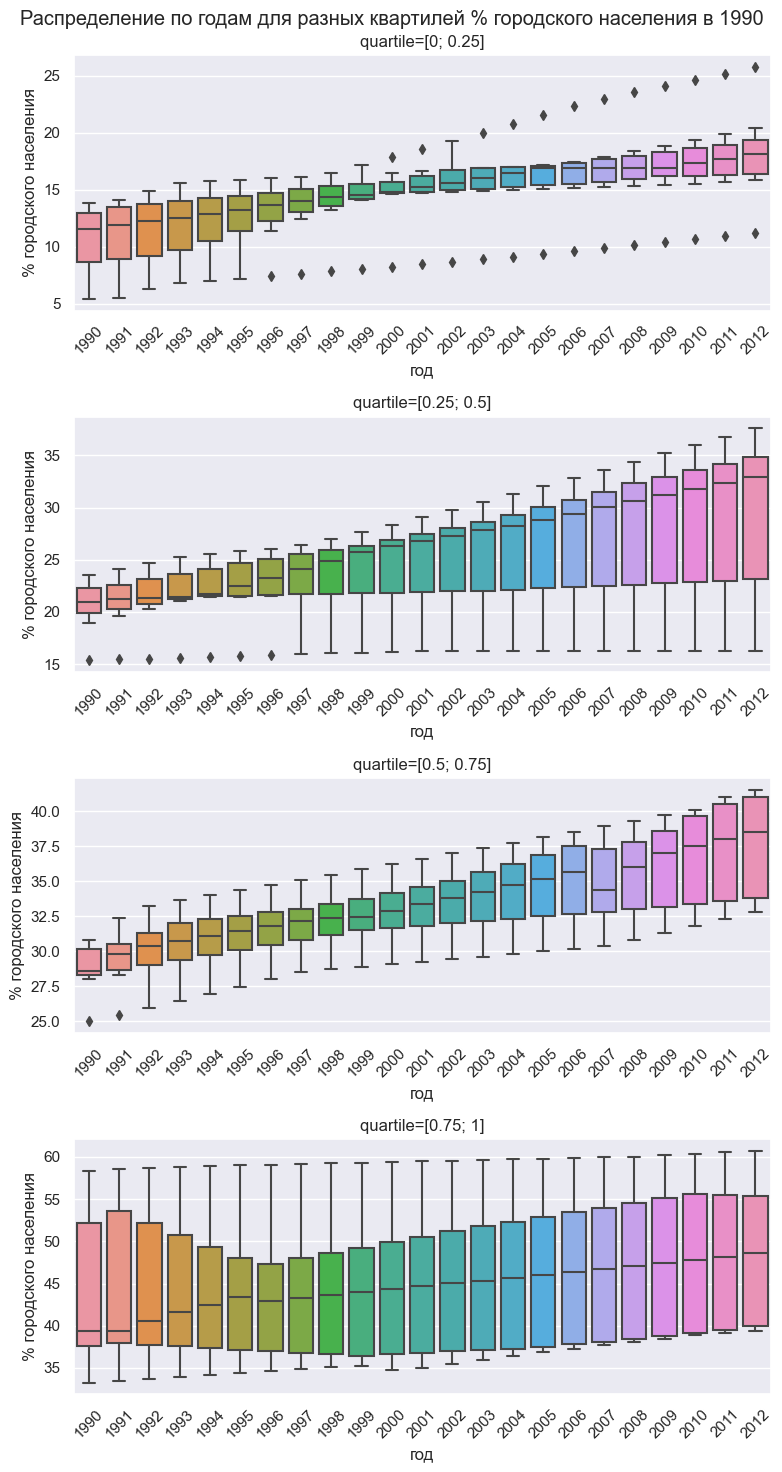

In [32]:

fig, axis = plt.subplots(4, 1, figsize=(8, 15))

quartiles = [0, 0.25, 0.5, 0.75, 1]
quarile_ranges = zip(quartiles[:-1], quartiles[1:])
low_income_1990 = low_income[low_income['year'] == 1990]


for ind, (st_q, en_q) in enumerate(quarile_ranges):
    ax = axis[ind]
    urb_col = low_income_1990['SP.URB.TOTL.IN.ZS']
    quantile_mask = (urb_col >= urb_col.quantile(st_q)) & (urb_col <= urb_col.quantile(en_q))
    countries = low_income_1990.loc[quantile_mask, 'country_code']
    countries_mask = df_pivot['country_code'].isin(countries)
    sns.boxplot(df_pivot[countries_mask],
                y='SP.URB.TOTL.IN.ZS',
                x='year',
                orient='v',
                ax=ax)
    ax.set_title(f'quartile=[{st_q}; {en_q}]')
    ax.set_ylabel('% городского населения')
    ax.set_xlabel('год')
    ax.tick_params(axis='x', labelrotation = 45)

fig.suptitle('Распределение по годам для разных квартилей % городского населения в 1990')
fig.tight_layout()

Анализ:
* [0; 0.25] - Среднее значение возросло в 1.5 раза. Минимальное в 3
* [0.25; 0.5] - Не так отчетливо видно увеличение, но среднее значение возросло в 1.5 раза. Увеличилась дисперсия
* [0.5; 0.75] - Тенденция к увеличению. Среднее значение возросло 1.25. Увеличилась дисперсия
* [0.75; 1] - Высока дисперсия, как в 1990, так и в 2012. Среднее значение возросло всего лишь на 1.125


Вывод:
Гипотеза подтверждается данными

### График разброса (показатель в 1900) ~ (прирост за 22 года)

In [33]:
year_pivot = low_income.pivot_table(index='country_name', columns='year', values='SP.URB.TOTL.IN.ZS')
growth = year_pivot.loc[:, 2012] - year_pivot.loc[:, 1990]
growth.rename('growth', inplace=True)
value_1990 = year_pivot.loc[:, 1990]
value_1990.rename('1990', inplace=True)
df_vis = pd.concat([growth, value_1990], axis=1)

fig = px.scatter(df_vis, y='growth', x='1990', trendline="ols")
fig.update_xaxes(title_text='% городоского населения в 1990')
fig.update_yaxes(title_text='Изменение % городского населения с 1990 по 2012')
fig.show()

Вывод: Видим, что % в 1990 практически не влияет на прирост. Особенно это заметно, если проигнорировать выбросы.

Почему же тогда BoxPlot выдал гораздо более положительный результат?
Проблема графика в том, что он выражает не относительный рост. Для страны с 10% прирост в 10% - это рост в 2 раза.

Изобразим на абсолютный, а относительный рост

In [34]:
df_vis_2 = df_vis.copy()
abs_growth = year_pivot[2012] / year_pivot[1990]
df_vis_2['growth'] = abs_growth
fig = px.scatter(df_vis_2, y='growth', x='1990', trendline="ols")
fig.update_xaxes(title_text='% городоского населения в 1990')
fig.update_yaxes(title_text='Во сколько раз вырос % городского населения')
fig.show()

Видим, что для относительного роста имеется убывающий тренд

### Вывод

Гипотеза подтверждается. Чем меньше % городского населения в 1990, тем больше относительный рост. Также верно, что % городского населения в 1990 практически не влияет на абсолютный рост

## Страны сегмента High Income имеют тенденцию к снижению выброса CO2 после 2007 года

### Тренд в среднем

In [35]:
mask = df_pivot['country_name'] == 'High income'
fig = px.line(df_pivot[mask], x='year', y='EN.ATM.CO2E.PC')
fig.update_xaxes(title_text='Год')
fig.update_yaxes(title_text='Выброс CO2 на душу наслеения')
fig.update_layout(title='Зависимость выброса CO2 от года для стран с высоким доходом')

Видим, что в среднем после 2007 года выброс CO2 достигает минимума

In [36]:
mask = df_pivot['IncomeGroup'] == 'High income'
high_income = df_pivot[mask]
print(f"Стран с высоким доходом:{high_income['country_code'].nunique()}")

Стран с высоким доходом:80


In [37]:
year_pivot = high_income.pivot_table(index='country_name', columns='year', values='EN.ATM.CO2E.PC')
growth = year_pivot.loc[:, 2012] / year_pivot.loc[:, 2007]
fig = px.histogram(x=growth, nbins=20)
fig.update_xaxes(title_text='"Выброс CO2 в 2012" / "в 2007"')
fig.update_yaxes(title_text='Количество стран')
fig.update_layout(title='Распределение Выброс CO2 в 2012" / "в 2007"  для стран с высоким доходом')
fig.show()

Вывод: видим, что большинству стран удалось уменьшить выброс CO2 в атмосферу, начиная с 2007 года

### Посмотрим на распределение по годам при помощи violin plot

In [38]:
def get_growth_from_2007(df, col_name):
    year_pivot = df.pivot_table(index='country_name', columns='year', values=col_name)
    year_growth_dict = {'year': [], 'growth': []}

    n_countries = len(year_pivot)
    for year in range(2008, 2012+1):
        growth = list(year_pivot.loc[:, year] / year_pivot.loc[:, 2007])
        year_growth_dict['year'].extend([year] * n_countries)
        year_growth_dict['growth'].extend(growth)

    year_growth_df = pd.DataFrame(year_growth_dict)
    return year_growth_df

Процент откинутых значение с growth > 2: 1.4


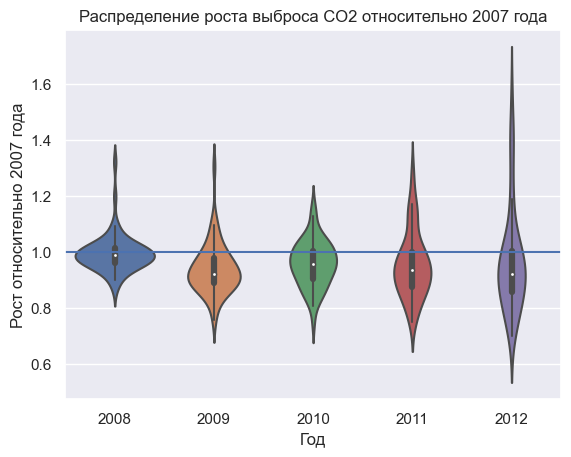

Процент откинутых значение с growth > 2: 1.4


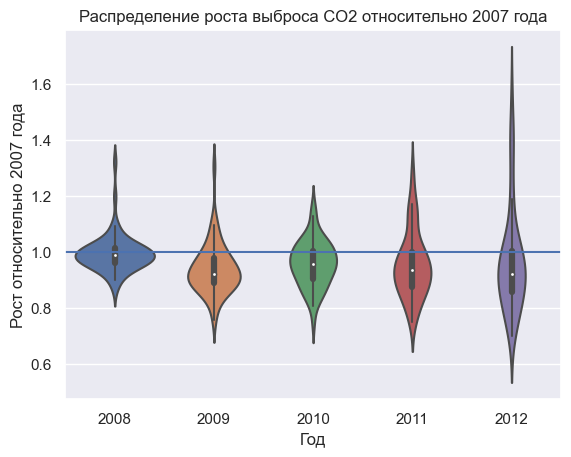

In [45]:

year_growth_df = get_growth_from_2007(high_income, 'EN.ATM.CO2E.PC')
# убираем выбросы
perc_of_outliers = round((year_growth_df['growth'] > 2).mean() * 100, 2)
print(f'Процент откинутых значение с growth > 2: {perc_of_outliers}')
year_growth_df = year_growth_df[year_growth_df['growth'] < 2]
sns.violinplot(year_growth_df, x='year', y='growth');
plt.axhline(y=1)
plt.xlabel('Год')
plt.ylabel('Рост относительно 2007 года')
plt.title('Распределение роста выброса CO2 относительно 2007 года');

Видим, что хоть и распределение меняется, но тенденция на уменьшение выброса CO2 по сравнении с 2007 годом остается

### Вывод

Гипотеза подтверждена

## Уменьшение выбросов CO2 после 2007 года имело линейный тренд для сектора High income

In [40]:
def get_regression_coef(df):
    df = df.copy()
    coef = LinearRegression().fit(df[['year']], df['EN.ATM.CO2E.PC']).coef_[0]
    return coef

def get_correlation(df):
    return df[['EN.ATM.CO2E.PC', 'year']].corr().iloc[0, 1]

only_2007_plus = high_income[high_income['year'] >= 2007]
only_2007_plus.dropna(inplace=True)
hi_2007_correlation = only_2007_plus.groupby('country_code').apply(get_correlation)
fig = px.histogram(x=hi_2007_correlation, nbins=20)
fig.update_xaxes(title_text='корреляция год ~ выброс CO2')
fig.update_yaxes(title_text='Количество стран')
fig.update_layout(title='Распределение корреляции год ~ выброс CO2 для стран с высокой прибылью, начиная с 2007 года',
                  title_font_size=11)

neg_correlation = round((hi_2007_correlation < 0).mean() * 100, 2)
strong_linear_trend = round((hi_2007_correlation.abs() > 0.85).mean() * 100, 2)
print(f'% стран с отрицательной корреляцией: {neg_correlation}')
print(f'% стран с сильной  корреляций: {strong_linear_trend}')
fig.show()

% стран с отрицательной корреляцией: 77.55
% стран с сильной  корреляций: 44.9


По графику распределения видно, что большинство стран имеют сильную отрицательную корреляцию

### Вывод

Текущая гипотеза частично подтверждена. 50% стран соответствуют гипотезе. Также лишний раз была подтверждена предудыщая гипотеза: "Страны сегмента High Income имеют тенденцию к снижению выброса CO2 после 2007 года"

## Уменьшение выбросов CO2 после 2007 года для стран с высокой прыбылью связано с более экономным использованием энергии

### Посмотрим на средние значения потребления энергии

In [41]:
hi_corr_countries = list((hi_2007_correlation < 0.75).index)
mask = only_2007_plus['country_code'].isin(hi_corr_countries)
high_correlation = only_2007_plus[mask]

def get_mean(df):
    return df['EG.USE.PCAP.KG.OE'].mean()
mean_eg_use = high_correlation.groupby('year').apply(get_mean).reset_index(name='mean energy use')
fig = px.line(mean_eg_use, x='year', y='mean energy use')
fig.update_layout(title='Среднее значение потребления энерги для стран с высокой прибылью и уменьшением CO2 после 2007', title_font_size=11)

fig.show()

Видно, что в среднем убыль есть, но она не выражена слишком сильно

### Посмотрим на распределение потребления энергии при помощи violin plot

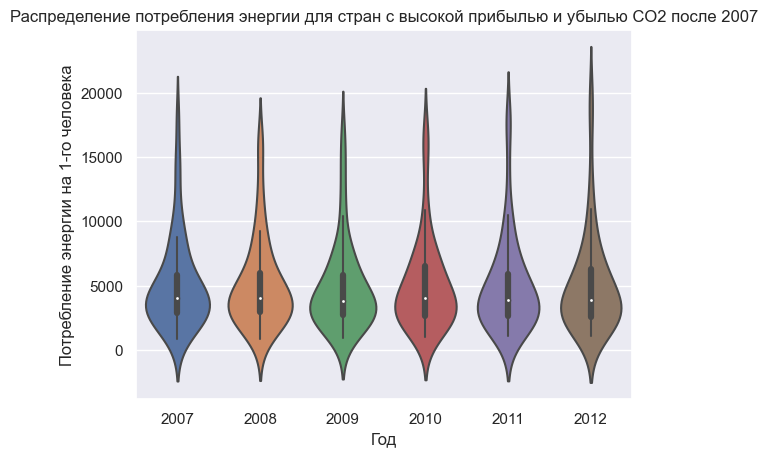

In [42]:
sns.violinplot(high_correlation, x='year', y='EG.USE.PCAP.KG.OE')
plt.xlabel('Год')
plt.ylabel('Потребление энергии на 1-го человека')
plt.title('Распределение потребления энергии для стран с высокой прибылью и убылью СO2 после 2007');

Видим, что violin plot не показывет сильных изменений в распределении затрат энергии

### Посмотрим на распределения роста увеличения энергии относительно 2007 года

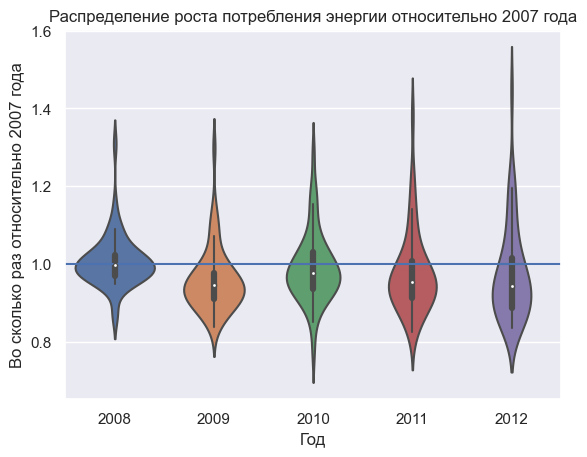

In [43]:
year_growth_df = get_growth_from_2007(high_correlation, 'EG.USE.PCAP.KG.OE')
sns.violinplot(year_growth_df, x='year', y='growth')
plt.axhline(y=1)
plt.xlabel('Год')
plt.ylabel('Во сколько раз относительно 2007 года')
plt.title('Распределение роста потребления энергии относительно 2007 года');

Вывод: Уменьшение энергии есть, но оно нестабильно. Возможно это связано с тем, что уменьшение выброса CO2 тоже не всегда только убывет

### Сравнение распределени уменьшения выбросов CO2 относительно 2007 года и уменьшение использования энергии

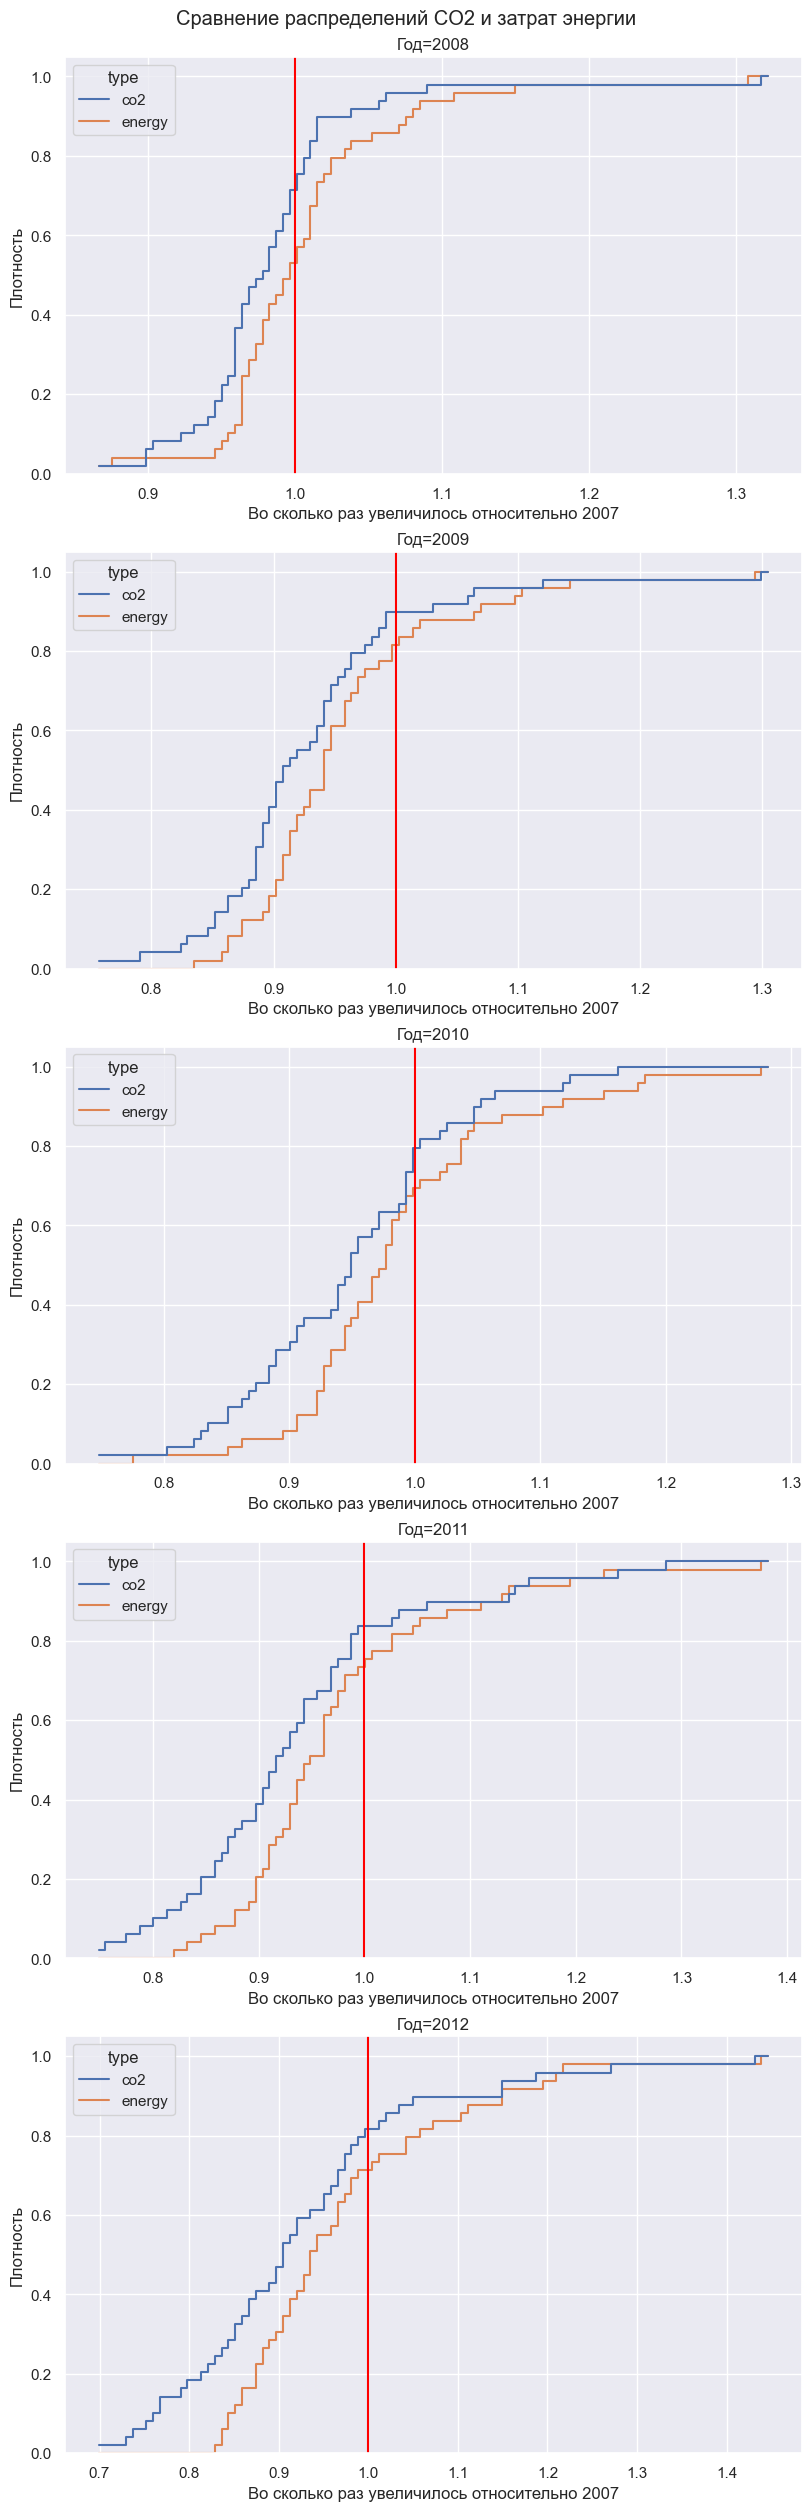

In [44]:
fig, axes = plt.subplots(5, 1, figsize=(8, 25), constrained_layout=True)

co2_growth = get_growth_from_2007(high_correlation, 'EN.ATM.CO2E.PC')
energy_growth = get_growth_from_2007(high_correlation, 'EG.USE.PCAP.KG.OE')

for ind, year in enumerate(range(2008, 2012+1)):
    ax = axes[ind]
    co2_selected = co2_growth[co2_growth['year'] == year]
    energy_selected = energy_growth[energy_growth['year'] == year]
    co2_selected['type'] = 'co2'
    energy_selected['type'] = 'energy'
    merged = pd.concat([co2_selected, energy_selected])
    # sns.histplot(data=merged, x='growth', hue='type', bins=15, stat='density', common_norm=False)
    sns.histplot(data=merged, x='growth', hue='type', bins=len(merged),
                 stat="density", element="step", fill=False, cumulative=True, common_norm=False, ax=ax)
    ax.axvline(x=1, color='red')
    ax.set_title(f'Год={year}')
    ax.set_xlabel('Во сколько раз увеличилось относительно 2007')
    ax.set_ylabel('Плотность')
    # sns.kdeplot()

fig.suptitle('Сравнение распределений CO2 и затрат энергии');

2008 год: Уменьшение выбросов C02 происходит большими темпами, чем уменьшение затрат энергии. В затратах энергии в среднем ничего не изменилось.

2009 год: Уменьшение затрат энергии и выброса CO2 прктически сравнялись, но выброс CO2 все равно уменьшается быстрее

2010 год: Увеличение разрыва

2011 год: Разрыв чуть уменьшился

2012: Разрыв увеличился

### Вывод

Вывод: снижение выбросов CO2 было получено не только за счет уменьшения потребления энергии, однако уменьшение потребления энергии тоже сыграло свою роль в этом